# **Cancer Research Abstracts: Topic Classification using ML Algorithms**

John Zumel & Samantha Zygmont

IST 736: Text Mining

Professor Bolton

In [ ]:
!pip install datasets transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import torch
from datasets import Dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Load NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# **Data Exploration**

## **Import Data**

In [ ]:
# Load dataset
df = pd.read_csv('alldata_1_for_kaggle.csv', encoding='latin1')
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [ ]:
# Rename columns
df.columns = ['Serial Number', 'Class', 'Abstract']

# Confirm changes
df.head()

,Serial Number,Class,Abstract
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [ ]:
# Drop unnecessary columns if applicable
if 'Serial Number' in df.columns:
    df.drop(columns=['Serial Number'], inplace=True)
# Confirm drop
df.head()

,Class,Abstract
0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [ ]:
df.shape

(7570, 2)

## **Initial Exploratory Data Analysis**

<ipython-input-7-56d4ba4f5aaa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='viridis')


Text(0, 0.5, 'Number of Documents')

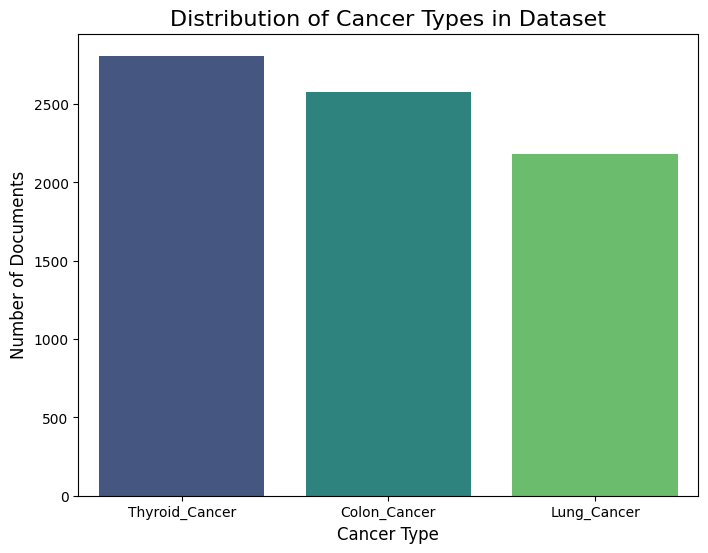

In [ ]:
# Plot distribution of 'Class Labels'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class', palette='viridis')
plt.title('Distribution of Cancer Types in Dataset', fontsize=16)
plt.xlabel('Cancer Type', fontsize=12)
plt.ylabel('Number of Documents', fontsize=12)

Unique class labels: ['Thyroid Cancer', 'Colon Cancer', 'Lung Cancer']
Categories (3, object): ['Colon Cancer', 'Lung Cancer', 'Thyroid Cancer']
Legend Labels: []


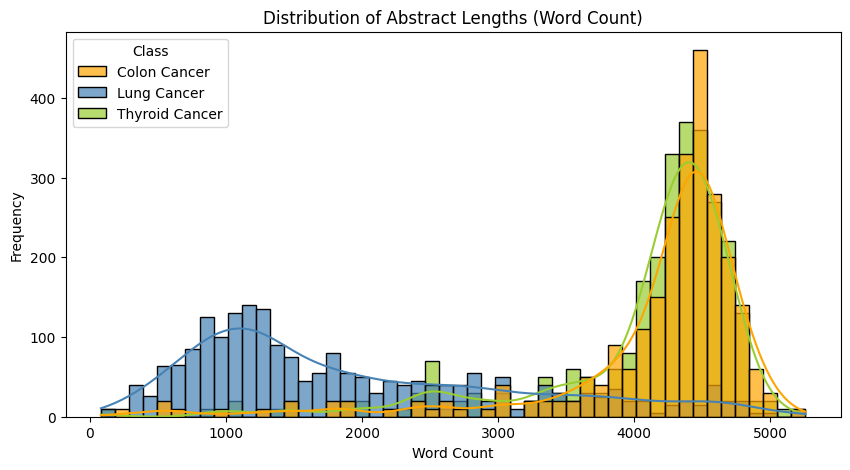

In [ ]:
# Compute text length features
df['word_count'] = df['Abstract'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['Abstract'].apply(lambda x: len(str(x)))

# Clean 'Class Labels' (strip spaces, replace underscores with spaces)
df['Class'] = df['Class'].str.strip()
df['Class'] = df['Class'].str.replace('_', ' ', regex=False)

# Ensure 'Class Labels' is categorical
df['Class'] = df['Class'].astype('category')

# Print unique class labels for debugging
print("Unique class labels:", df['Class'].unique())

# Set a custom color palette for specific cancer types
palette = {
    'Lung Cancer': 'steelblue',
    'Thyroid Cancer': 'yellowgreen',
    'Colon Cancer': 'orange'
}

# Add colors for other cancer types (if any)
other_cancer_types = df['Class'].unique()
for cancer in other_cancer_types:
    if cancer not in palette:
        palette[cancer] = sns.color_palette("viridis", len(other_cancer_types))[list(other_cancer_types).index(cancer)]

# Create histogram
plt.figure(figsize=(10, 5))
ax = sns.histplot(df, x='word_count', hue='Class', bins=50, kde=True, alpha=0.7, palette=palette)

# Ensure legend is correctly assigned
handles, labels = ax.get_legend_handles_labels()

# Debugging: Print handles and labels
print("Legend Labels:", labels)

# Add labels & title
plt.title('Distribution of Abstract Lengths (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Show plot
plt.show()

<ipython-input-9-baa961f73b53>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='word_count', data=df, palette=palette)


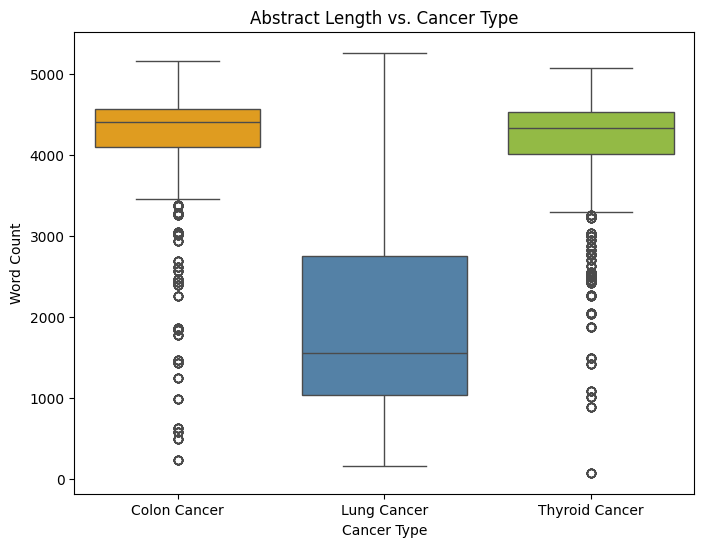

In [ ]:
# Boxplot: Abstract length vs. Cancer type
plt.figure(figsize=(8, 6))
palette = {
    'Lung Cancer': 'steelblue',
    'Thyroid Cancer': 'yellowgreen',
    'Colon Cancer': 'orange'
}

# Create the boxplot with custom colors
sns.boxplot(x='Class', y='word_count', data=df, palette=palette)
plt.title('Abstract Length vs. Cancer Type')
plt.xlabel('Cancer Type')
plt.ylabel('Word Count')
plt.show()

# **Data Preprocessing & Vectorization**

In [ ]:
# Text Preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)  # Join tokens back into text

# Apply preprocessing with tqdm for tracking preprocessing progress
print("Preprocessing text...")
tqdm.pandas()
df['Processed_Abstract'] = df['Abstract'].progress_apply(preprocess_text)

Preprocessing text...


100%|██████████| 7570/7570 [01:27<00:00, 86.89it/s]


In [ ]:
# Define features and labels
X = df['Processed_Abstract']
y = df['Class']

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# **Word Cloud for Each Cancer Type After Vectorization**

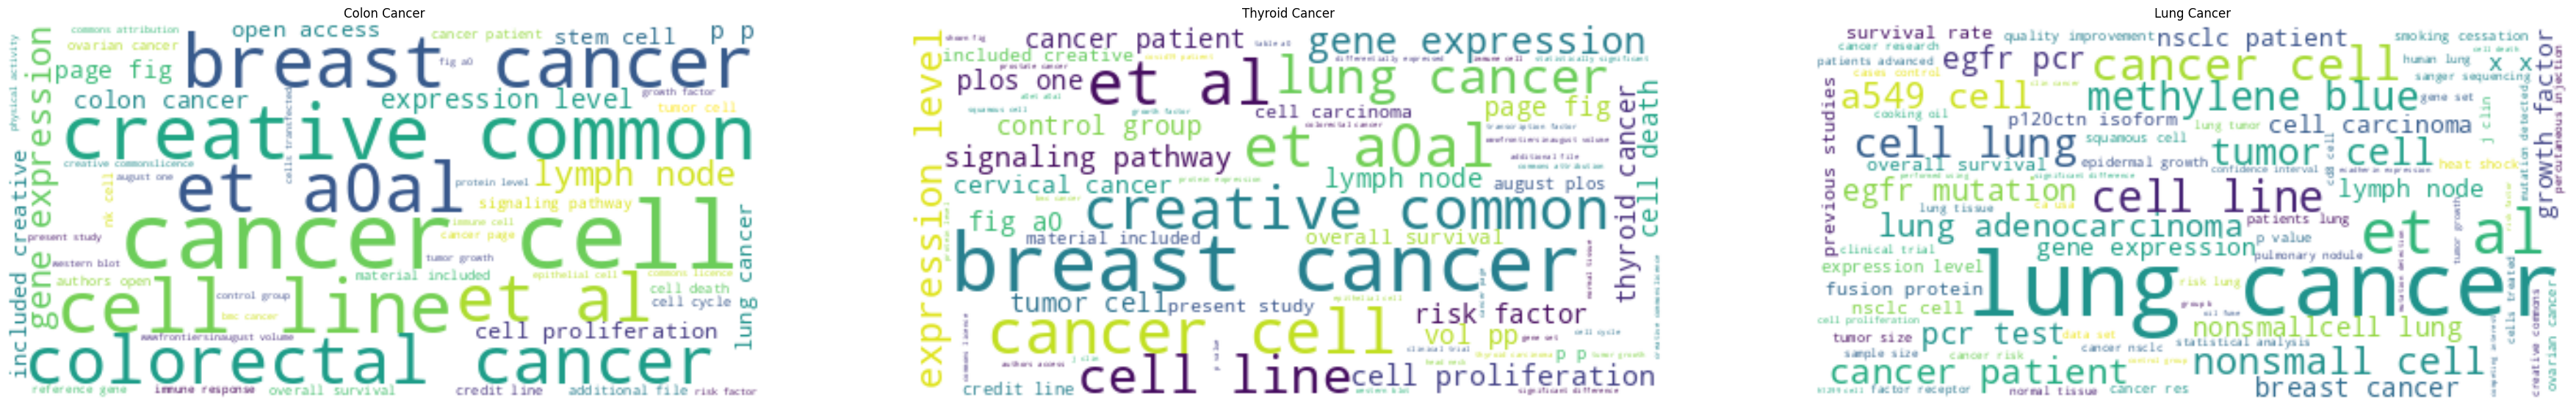

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the dataset for each cancer type
colon_cancer_abstracts = df[df['Class'] == 'Colon Cancer']['Processed_Abstract']
thyroid_cancer_abstracts = df[df['Class'] == 'Thyroid Cancer']['Processed_Abstract']
lung_cancer_abstracts = df[df['Class'] == 'Lung Cancer']['Processed_Abstract']

# Join the abstracts for each cancer type into one string
colon_cancer_text = " ".join(colon_cancer_abstracts)
thyroid_cancer_text = " ".join(thyroid_cancer_abstracts)
lung_cancer_text = " ".join(lung_cancer_abstracts)

# Generate word clouds for each cancer type
colon_cancer_wordcloud = WordCloud(stopwords='english', max_words=200, background_color='white').generate(colon_cancer_text)
thyroid_cancer_wordcloud = WordCloud(stopwords='english', max_words=200, background_color='white').generate(thyroid_cancer_text)
lung_cancer_wordcloud = WordCloud(stopwords='english', max_words=200, background_color='white').generate(lung_cancer_text)

# Plot the word clouds
plt.figure(figsize=(45, 30))

plt.subplot(1, 3, 1)
plt.imshow(colon_cancer_wordcloud, interpolation='bilinear')
plt.title('Colon Cancer')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thyroid_cancer_wordcloud, interpolation='bilinear')
plt.title('Thyroid Cancer')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(lung_cancer_wordcloud, interpolation='bilinear')
plt.title('Lung Cancer')
plt.axis('off')

plt.show()

# **Modeling**

## **Baseline Models**

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_train:", y_train.shape)

Shape of X_train: (6056, 5000)
Shape of X_train: (6056,)


In [ ]:
# Logistic Regression
print("Training Logistic Regression...")
log_reg = LogisticRegression(
    C=0.1,             # Regularization strength
    solver='saga',  # Solver for small datasets
    penalty='l2',        # L2 regularization
    max_iter=1000        # Increase iterations if not converging
)
log_reg.fit(X_train, y_train)

# Training accuracy
train_accuracy_log = log_reg.score(X_train, y_train)
print(f"Logistic Regression Train Accuracy: {train_accuracy_log:.4f}")

# Testing accuracy
y_pred_log = log_reg.predict(X_test)
test_accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Test Accuracy: {test_accuracy_log:.4f}")

Training Logistic Regression...
Logistic Regression Train Accuracy: 0.9259
Logistic Regression Test Accuracy: 0.9135


Create a DF to store the accuracies

In [ ]:
import pandas as pd

# Create a DataFrame to store model accuracies
model_accuracies = pd.DataFrame({
    'Model': ['LR (C=0.1)'],
    'Training Accuracy': [train_accuracy_log],
    'Validation Accuracy': [test_accuracy_log]
})

# Display
model_accuracies

,Model,Training Accuracy,Validation Accuracy
0,LR (C=0.1),0.925859,0.913474


In [ ]:
# Logistic Regression
print("Training Logistic Regression...")
log_reg2 = LogisticRegression(
    C=1,             # Regularization strength
    solver='saga',  # Solver for small datasets
    penalty='l2',        # L2 regularization
    max_iter=1000        # Increase iterations if not converging
)
log_reg2.fit(X_train, y_train)

# Training accuracy
train_accuracy_log2 = log_reg2.score(X_train, y_train)
print(f"Logistic Regression Train Accuracy: {train_accuracy_log2:.4f}")

# Testing accuracy
y_pred_log2 = log_reg2.predict(X_test)
test_accuracy_log2 = accuracy_score(y_test, y_pred_log2)
print(f"Logistic Regression Test Accuracy: {test_accuracy_log2:.4f}")

Training Logistic Regression...
Logistic Regression Train Accuracy: 0.9600
Logistic Regression Test Accuracy: 0.9419


In [ ]:
# Add Logistic Regression 2 accuracies
model_accuracies = pd.concat([model_accuracies, pd.DataFrame([{
    'Model': 'LR (C=1)',
    'Training Accuracy': train_accuracy_log2,
    'Validation Accuracy': test_accuracy_log2
}])], ignore_index=True)

print(model_accuracies)

        Model  Training Accuracy  Validation Accuracy
0  LR (C=0.1)           0.925859             0.913474
1    LR (C=1)           0.960040             0.941876


In [ ]:
# Multinomial Naive Bayes
print("Training Multinomial Naïve Bayes...")
nb = MultinomialNB(
    alpha=0.1,      # Smoothing parameter
    fit_prior=True   # Adjust priors according to the data
)
nb.fit(X_train, y_train)

# Training accuracy
train_accuracy_nb = nb.score(X_train, y_train)
print(f"Naïve Bayes Train Accuracy: {train_accuracy_nb:.4f}")

# Testing accuracy
y_pred_nb = nb.predict(X_test)
test_accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naïve Bayes Test Accuracy: {test_accuracy_nb:.4f}")

Training Multinomial Naïve Bayes...
Naïve Bayes Train Accuracy: 0.9235
Naïve Bayes Test Accuracy: 0.9062


In [ ]:
# Add MNB accuracies
model_accuracies = pd.concat([model_accuracies, pd.DataFrame([{
    'Model': 'MNB (alpha=0.1)',
    'Training Accuracy': train_accuracy_nb,
    'Validation Accuracy': test_accuracy_nb
}])], ignore_index=True)

print(model_accuracies)

             Model  Training Accuracy  Validation Accuracy
0       LR (C=0.1)           0.925859             0.913474
1         LR (C=1)           0.960040             0.941876
2  MNB (alpha=0.1)           0.923547             0.906209


In [ ]:
# Multinomial Naive Bayes
print("Training Multinomial Naïve Bayes...")
nb2 = MultinomialNB(
    alpha=1,      # Smoothing parameter
    fit_prior=True   # Adjust priors according to the data
)
nb2.fit(X_train, y_train)

# Training accuracy
train_accuracy_nb2 = nb2.score(X_train, y_train)
print(f"Naïve Bayes Train Accuracy: {train_accuracy_nb2:.4f}")

# Testing accuracy
y_pred_nb2 = nb2.predict(X_test)
test_accuracy_nb2 = accuracy_score(y_test, y_pred_nb2)
print(f"Naïve Bayes Test Accuracy: {test_accuracy_nb2:.4f}")

Training Multinomial Naïve Bayes...
Naïve Bayes Train Accuracy: 0.9133
Naïve Bayes Test Accuracy: 0.8943


In [ ]:
# Add MNB 2 accuracies
model_accuracies = pd.concat([model_accuracies, pd.DataFrame([{
    'Model': 'MNB (alpha=1)',
    'Training Accuracy': train_accuracy_nb2,
    'Validation Accuracy': test_accuracy_nb2
}])], ignore_index=True)

print(model_accuracies)

             Model  Training Accuracy  Validation Accuracy
0       LR (C=0.1)           0.925859             0.913474
1         LR (C=1)           0.960040             0.941876
2  MNB (alpha=0.1)           0.923547             0.906209
3    MNB (alpha=1)           0.913309             0.894320


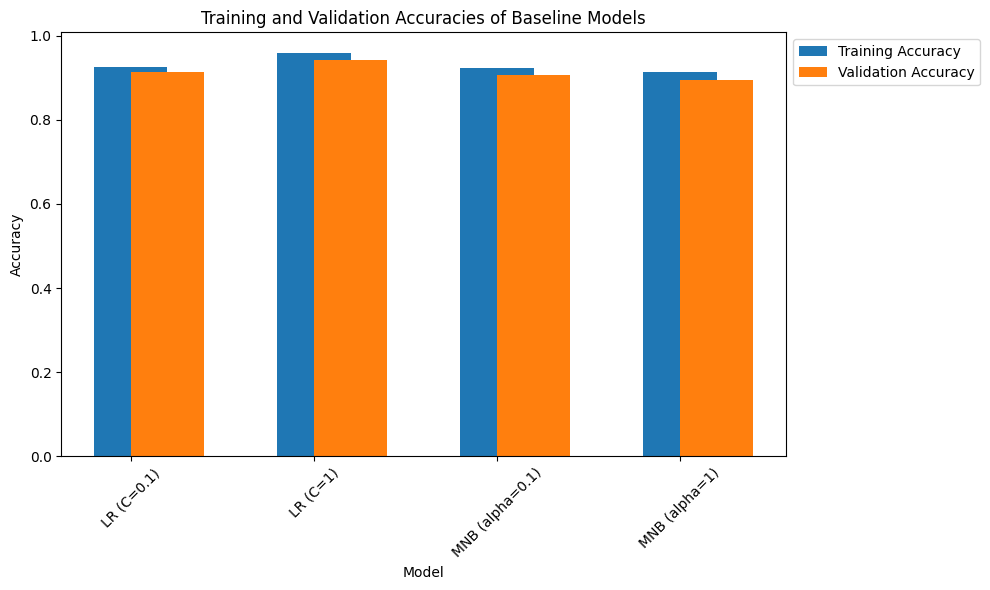

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and testing accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies['Model'], model_accuracies['Training Accuracy'], width=0.4, label='Training Accuracy', align='center')
plt.bar(model_accuracies['Model'], model_accuracies['Validation Accuracy'], width=0.4, label='Validation Accuracy', align='edge')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies of Baseline Models')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Intermediate Models**

In [ ]:
# SVM Linear
print("Training SVM with linear kernel...")
svm_linear_model = SVC(
    C=0.1,              # Regularization strength
    kernel='linear',    # Linear kernel
    class_weight='balanced'  # Handle class imbalance
)
svm_linear_model.fit(X_train, y_train)  # Fit model

# Training accuracy
train_accuracy_svm_linear = svm_linear_model.score(X_train, y_train)
# Testing accuracy
y_pred_svm_linear = svm_linear_model.predict(X_test)
test_accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)

print(f"SVM Training Accuracy: {train_accuracy_svm_linear:.4f}")
print(f"SVM Test Accuracy: {test_accuracy_svm_linear:.4f}")

Training SVM with linear kernel...
SVM Training Accuracy: 0.9221
SVM Test Accuracy: 0.9155


In [ ]:
import pandas as pd

# Create a DataFrame to store model accuracies
inter_model_accuracies = pd.DataFrame({
    'Model': ['SVM (C=0.1, linear)'],
    'Training Accuracy': [train_accuracy_svm_linear],
    'Validation Accuracy': [test_accuracy_svm_linear]
})

# Display
inter_model_accuracies

,Model,Training Accuracy,Validation Accuracy
0,"SVM (C=0.1, linear)",0.922061,0.915456


In [ ]:
# SVM Linear
print("Training SVM with linear kernel...")
svm_linear_model2 = SVC(
    C=1,              # Regularization strength
    kernel='linear',    # Linear kernel
    class_weight='balanced'  # Handle class imbalance
)
svm_linear_model2.fit(X_train, y_train)  # Fit model

# Training accuracy
train_accuracy_svm_linear2 = svm_linear_model2.score(X_train, y_train)
# Testing accuracy
y_pred_svm_linear2 = svm_linear_model2.predict(X_test)
test_accuracy_svm_linear2 = accuracy_score(y_test, y_pred_svm_linear2)

print(f"SVM Training Accuracy: {train_accuracy_svm_linear2:.4f}")
print(f"SVM Test Accuracy: {test_accuracy_svm_linear2:.4f}")

Training SVM with linear kernel...
SVM Training Accuracy: 0.9434
SVM Test Accuracy: 0.9227


In [ ]:
# Add SVM 2 accuracies
inter_model_accuracies = pd.concat([inter_model_accuracies, pd.DataFrame([{
    'Model': 'SVM (C=1, linear)',
    'Training Accuracy': train_accuracy_svm_linear2,
    'Validation Accuracy': test_accuracy_svm_linear2
}])], ignore_index=True)

print(inter_model_accuracies)

                 Model  Training Accuracy  Validation Accuracy
0  SVM (C=0.1, linear)           0.922061             0.915456
1    SVM (C=1, linear)           0.943362             0.922721


In [ ]:
# SVM RBF
print("Training SVM with RBF kernel...")
svm_rbf_model = SVC(
    C=0.1,              # Regularization strength
    kernel='rbf',    # RBF kernel
    class_weight='balanced'  # Handle class imbalance
)
svm_rbf_model.fit(X_train, y_train)  # Fit model

# Training accuracy
train_accuracy_svm_rbf = svm_rbf_model.score(X_train, y_train)
# Testing accuracy
y_pred_svm_rbf = svm_rbf_model.predict(X_test)
test_accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)

print(f"SVM Training Accuracy: {train_accuracy_svm_rbf:.4f}")
print(f"SVM Test Accuracy: {test_accuracy_svm_rbf:.4f}")

Training SVM with RBF kernel...
SVM Training Accuracy: 0.9364
SVM Test Accuracy: 0.9273


In [ ]:
# Add SVM 3 accuracies
inter_model_accuracies = pd.concat([inter_model_accuracies, pd.DataFrame([{
    'Model': 'SVM (C=0.1, rbf)',
    'Training Accuracy': train_accuracy_svm_rbf,
    'Validation Accuracy': test_accuracy_svm_rbf
}])], ignore_index=True)

print(inter_model_accuracies)

                 Model  Training Accuracy  Validation Accuracy
0  SVM (C=0.1, linear)           0.922061             0.915456
1    SVM (C=1, linear)           0.943362             0.922721
2     SVM (C=0.1, rbf)           0.936427             0.927345


In [ ]:
# SVM RBF
print("Training SVM with RBF kernel...")
svm_rbf_model2 = SVC(
    C=1,              # Regularization strength
    kernel='rbf',    # RBF kernel
    class_weight='balanced'  # Handle class imbalance
)
svm_rbf_model2.fit(X_train, y_train)  # Fit model

# Training accuracy
train_accuracy_svm_rbf2 = svm_rbf_model2.score(X_train, y_train)
# Testing accuracy
y_pred_svm_rbf2 = svm_rbf_model2.predict(X_test)
test_accuracy_svm_rbf2 = accuracy_score(y_test, y_pred_svm_rbf2)

print(f"SVM Training Accuracy: {train_accuracy_svm_rbf2:.4f}")
print(f"SVM Test Accuracy: {test_accuracy_svm_rbf2:.4f}")

Training SVM with RBF kernel...
SVM Training Accuracy: 0.9460
SVM Test Accuracy: 0.9188


In [ ]:
# Add SVM 4 accuracies
inter_model_accuracies = pd.concat([inter_model_accuracies, pd.DataFrame([{
    'Model': 'SVM (C=1, rbf)',
    'Training Accuracy': train_accuracy_svm_rbf2,
    'Validation Accuracy': test_accuracy_svm_rbf2
}])], ignore_index=True)

print(inter_model_accuracies)

                 Model  Training Accuracy  Validation Accuracy
0  SVM (C=0.1, linear)           0.922061             0.915456
1    SVM (C=1, linear)           0.943362             0.922721
2     SVM (C=0.1, rbf)           0.936427             0.927345
3       SVM (C=1, rbf)           0.946004             0.918758


In [ ]:
# SVM Poly
print("Training SVM with polynomial kernel...")
svm_poly_model = SVC(
    C=0.1,              # Regularization strength
    kernel='poly',    # Poly kernel
    class_weight='balanced'  # Handle class imbalance
)
svm_poly_model.fit(X_train, y_train)  # Fit model

# Training accuracy
train_accuracy_svm_poly = svm_poly_model.score(X_train, y_train)
# Testing accuracy
y_pred_svm_poly = svm_poly_model.predict(X_test)
test_accuracy_svm_poly = accuracy_score(y_test, y_pred_svm_poly)

print(f"SVM Training Accuracy: {train_accuracy_svm_poly:.4f}")
print(f"SVM Test Accuracy: {test_accuracy_svm_poly:.4f}")

Training SVM with polynomial kernel...
SVM Training Accuracy: 0.9425
SVM Test Accuracy: 0.9161


In [ ]:
# Add SVM 5 accuracies
inter_model_accuracies = pd.concat([inter_model_accuracies, pd.DataFrame([{
    'Model': 'SVM (C=0.1, poly)',
    'Training Accuracy': train_accuracy_svm_poly,
    'Validation Accuracy': test_accuracy_svm_poly
}])], ignore_index=True)

print(inter_model_accuracies)

                 Model  Training Accuracy  Validation Accuracy
0  SVM (C=0.1, linear)           0.922061             0.915456
1    SVM (C=1, linear)           0.943362             0.922721
2     SVM (C=0.1, rbf)           0.936427             0.927345
3       SVM (C=1, rbf)           0.946004             0.918758
4    SVM (C=0.1, poly)           0.942536             0.916116


In [ ]:
# SVM Poly
print("Training SVM with polynomial kernel...")
svm_poly_model2 = SVC(
    C=1,              # Regularization strength
    kernel='poly',    # Poly kernel
    class_weight='balanced'  # Handle class imbalance
)
svm_poly_model2.fit(X_train, y_train)  # Fit model

# Training accuracy
train_accuracy_svm_poly2 = svm_poly_model2.score(X_train, y_train)
# Testing accuracy
y_pred_svm_poly2 = svm_poly_model2.predict(X_test)
test_accuracy_svm_poly2 = accuracy_score(y_test, y_pred_svm_poly2)

print(f"SVM Training Accuracy: {train_accuracy_svm_poly2:.4f}")
print(f"SVM Test Accuracy: {test_accuracy_svm_poly2:.4f}")

Training SVM with polynomial kernel...
SVM Training Accuracy: 0.9435
SVM Test Accuracy: 0.9155


In [ ]:
# Add SVM 6 accuracies
inter_model_accuracies = pd.concat([inter_model_accuracies, pd.DataFrame([{
    'Model': 'SVM (C=1, poly)',
    'Training Accuracy': train_accuracy_svm_poly2,
    'Validation Accuracy': test_accuracy_svm_poly2
}])], ignore_index=True)

print(inter_model_accuracies)

                 Model  Training Accuracy  Validation Accuracy
0  SVM (C=0.1, linear)           0.922061             0.915456
1    SVM (C=1, linear)           0.943362             0.922721
2     SVM (C=0.1, rbf)           0.936427             0.927345
3       SVM (C=1, rbf)           0.946004             0.918758
4    SVM (C=0.1, poly)           0.942536             0.916116
5      SVM (C=1, poly)           0.943527             0.915456


In [ ]:
# Random Forest
print("Training Random Forest...")

# Initialize Random Forest with chosen parameters
rf_model = RandomForestClassifier(
    n_estimators=150,   # Reduce trees slightly to prevent overfitting
    max_depth=10,       # Lower depth to limit tree complexity
    min_samples_split=15,  # More samples needed to split, reducing variance
    min_samples_leaf=10,   # Larger leaves to prevent very small node splits
    max_features="sqrt",  # Consider only a subset of features per split (better generalization)
    bootstrap=True,       # Use bootstrapping for robust predictions
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Training accuracy
train_accuracy_rf = rf_model.score(X_train, y_train)
# Testing accuracy
y_pred_rf = rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"RF Training Accuracy: {train_accuracy_rf:.4f}")
print(f"RF Test Accuracy: {test_accuracy_rf:.4f}")

Training Random Forest...
RF Training Accuracy: 0.9979
RF Test Accuracy: 0.9954


In [ ]:
# Add random forest accuracies
inter_model_accuracies = pd.concat([inter_model_accuracies, pd.DataFrame([{
    'Model': 'Random Forest',
    'Training Accuracy': train_accuracy_rf,
    'Validation Accuracy': test_accuracy_rf
}])], ignore_index=True)

print(inter_model_accuracies)

                 Model  Training Accuracy  Validation Accuracy
0  SVM (C=0.1, linear)           0.922061             0.915456
1    SVM (C=1, linear)           0.943362             0.922721
2     SVM (C=0.1, rbf)           0.936427             0.927345
3       SVM (C=1, rbf)           0.946004             0.918758
4    SVM (C=0.1, poly)           0.942536             0.916116
5      SVM (C=1, poly)           0.943527             0.915456
6        Random Forest           0.997853             0.995376


In [ ]:
# Rename 'Random Forest' to 'RF (default, flexible)'
inter_model_accuracies['Model'] = inter_model_accuracies['Model'].replace('Random Forest', 'RF (default, flexible)')

# Print the updated DataFrame
print(inter_model_accuracies)

                    Model  Training Accuracy  Validation Accuracy
0     SVM (C=0.1, linear)           0.922061             0.915456
1       SVM (C=1, linear)           0.943362             0.922721
2        SVM (C=0.1, rbf)           0.936427             0.927345
3          SVM (C=1, rbf)           0.946004             0.918758
4       SVM (C=0.1, poly)           0.942536             0.916116
5         SVM (C=1, poly)           0.943527             0.915456
6  RF (default, flexible)           0.997853             0.995376


In [ ]:
# Initialize Random Forest with tuned parameters
rf_model2 = RandomForestClassifier(
    n_estimators=300,        # Increased trees for better model stability
    max_depth=8,             # Slightly shallower trees to limit overfitting
    min_samples_split=20,    # More samples required for a split, reducing variance
    min_samples_leaf=15,     # Increased leaf size to avoid overfitting small splits
    max_features="sqrt",     # Randomly select a subset of features per split
    bootstrap=True,          # Use bootstrapping for diverse trees
    random_state=42,
    n_jobs=-1,               # Utilize all cores for faster computation
    class_weight="balanced"  # Adjust for class imbalance (if applicable)
)
rf_model2.fit(X_train, y_train)

# Training accuracy
train_accuracy_rf2 = rf_model2.score(X_train, y_train)
# Testing accuracy
y_pred_rf2 = rf_model2.predict(X_test)
test_accuracy_rf2 = accuracy_score(y_test, y_pred_rf2)

print(f"RF Training Accuracy: {train_accuracy_rf2:.4f}")
print(f"RF Test Accuracy: {test_accuracy_rf2:.4f}")

RF Training Accuracy: 0.9884
RF Test Accuracy: 0.9868


In [ ]:
# Add random forest accuracies
inter_model_accuracies = pd.concat([inter_model_accuracies, pd.DataFrame([{
    'Model': 'RF (tuned, conservative)',
    'Training Accuracy': train_accuracy_rf2,
    'Validation Accuracy': test_accuracy_rf2
}])], ignore_index=True)

print(inter_model_accuracies)

                      Model  Training Accuracy  Validation Accuracy
0       SVM (C=0.1, linear)           0.922061             0.915456
1         SVM (C=1, linear)           0.943362             0.922721
2          SVM (C=0.1, rbf)           0.936427             0.927345
3            SVM (C=1, rbf)           0.946004             0.918758
4         SVM (C=0.1, poly)           0.942536             0.916116
5           SVM (C=1, poly)           0.943527             0.915456
6    RF (default, flexible)           0.997853             0.995376
7  RF (tuned, conservative)           0.988441             0.986790


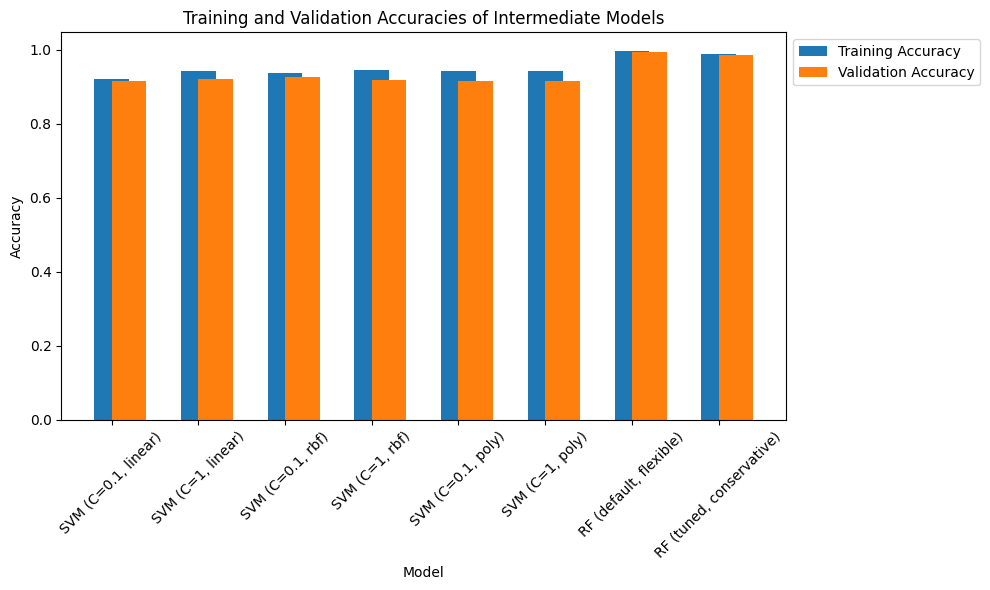

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and testing accuracies
plt.figure(figsize=(10, 6))
plt.bar(inter_model_accuracies['Model'], inter_model_accuracies['Training Accuracy'], width=0.4, label='Training Accuracy', align='center')
plt.bar(inter_model_accuracies['Model'], inter_model_accuracies['Validation Accuracy'], width=0.4, label='Validation Accuracy', align='edge')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies of Intermediate Models')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Other (CVs)**

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize Random Forest with chosen parameters (same as the model giving 100% accuracy)
rf_model = RandomForestClassifier(
    n_estimators=100,   # Number of trees in the forest
    max_depth=10,      # Maximum depth of the tree (None means nodes are expanded until all leaves are pure)
    min_samples_split=10,  # More samples required to split a node
    min_samples_leaf=5,    # More samples required at leaf node
    random_state=42,     # Set a random state for reproducibility
    n_jobs=-1            # Use all CPU cores for parallel processing
)

# Perform cross-validation (e.g., 10-fold CV)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')

# Output cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.99174917 0.9950495  0.9950495  1.         0.99669967 0.9950495
 0.99338843 0.99504132 0.99338843 0.98677686]
Mean Cross-Validation Accuracy: 0.9942
Standard Deviation of Cross-Validation Accuracy: 0.0032


In [ ]:
cv_results = pd.DataFrame({
    'Model': ['Random Forest'],
    'CV Scores': [cv_scores],
    'Average CV Score': [cv_scores.mean()],
    'Standard Deviation': [cv_scores.std()]
})

cv_results

,Model,CV Scores,Average CV Score,Standard Deviation
0,Random Forest,"[0.9917491749174917, 0.995049504950495, 0.9950...",0.994219,0.003243


In [ ]:
# Initialize Random Forest with constraints to prevent overfitting
rf_model = RandomForestClassifier(
    n_estimators=100,   # Number of trees in the forest
    max_depth=10,      # Maximum depth of the tree (None means nodes are expanded until all leaves are pure)
    min_samples_split=10,  # More samples required to split a node
    min_samples_leaf=5,    # More samples required at leaf node
    random_state=42,     # Set a random state for reproducibility
    n_jobs=-1            # Use all CPU cores for parallel processing
)

# Cross-validation setup using Stratified K-Folds (ensure class distribution is maintained in each fold)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
cv_scores2 = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

# Output the cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Average Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")

Cross-Validation Accuracy Scores: [0.99174917 0.9950495  0.9950495  1.         0.99669967 0.9950495
 0.99338843 0.99504132 0.99338843 0.98677686]
Average Cross-Validation Accuracy: 0.9942
Standard Deviation of CV Accuracy: 0.0032


In [ ]:
cv_results = pd.concat([cv_results, pd.DataFrame([{
    'Model': ['Random Forest-With Overfitting Constraints'],
    'CV Scores': [cv_scores2],
    'Average CV Score': [cv_scores2.mean()],
    'Standard Deviation': [cv_scores2.std()]
}])], ignore_index=True)

cv_results

,Model,CV Scores,Average CV Score,Standard Deviation
0,Random Forest,"[0.9917491749174917, 0.995049504950495, 0.9950...",0.994219,0.003243
1,[Random Forest-With Overfitting Constraints],"[[0.9884488448844885, 0.9966996699669967, 0.99...",[0.9928991080926275],[0.0045576555691190625]


# **Testing Set from New Data**

In [ ]:
# Import new data
new_df = pd.read_excel('data2.xlsx')

# To see the first few rows of the data
print(new_df.head())

                                               Title  \
0  Clinically Relevant Germline Variants in Child...   
1  Unraveling the role of gut microbiota and immu...   
2  METTL14-mediated m6A modification upregulated ...   
3  Impact of demographics and social vulnerabilit...   
4  Comparative efficacy, safety, and oncological ...   

                                            Abstract           Label  
0  Context: The underlying genetic cause of nonme...  Thyroid_Cancer  
1  The gut microbiota (GM) and immune cells (IC) ...  Thyroid_Cancer  
2  Thyroid cancer (TC) is the most common maligna...  Thyroid_Cancer  
3  Objective: To evaluate the impact of social vu...  Thyroid_Cancer  
4  Background: Thermal and chemical ablation tech...  Thyroid_Cancer  


In [ ]:
# Drop the 'Title' column
new_df = new_df.drop(columns=['Title'])

# Verify the column is dropped
print(new_df.head())

                                            Abstract           Label
0  Context: The underlying genetic cause of nonme...  Thyroid_Cancer
1  The gut microbiota (GM) and immune cells (IC) ...  Thyroid_Cancer
2  Thyroid cancer (TC) is the most common maligna...  Thyroid_Cancer
3  Objective: To evaluate the impact of social vu...  Thyroid_Cancer
4  Background: Thermal and chemical ablation tech...  Thyroid_Cancer


In [ ]:
# Rename columns
new_df = new_df.rename(columns={'Abstract': 'Abstract', 'Label': 'Class'})

# Verify the columns have been renamed
print(new_df.head())

                                            Abstract           Class
0  Context: The underlying genetic cause of nonme...  Thyroid_Cancer
1  The gut microbiota (GM) and immune cells (IC) ...  Thyroid_Cancer
2  Thyroid cancer (TC) is the most common maligna...  Thyroid_Cancer
3  Objective: To evaluate the impact of social vu...  Thyroid_Cancer
4  Background: Thermal and chemical ablation tech...  Thyroid_Cancer


Combine Both Datasets to check if there are any duplicates between the new datasets!

## **Preprocess New Data**

In [ ]:
# Replace underscores with spaces in the 'Class' column
new_df['Class'] = new_df['Class'].str.replace('_', ' ', regex=False)

# Check the updated 'Class' column
print(new_df['Class'].head())

0    Thyroid Cancer
1    Thyroid Cancer
2    Thyroid Cancer
3    Thyroid Cancer
4    Thyroid Cancer
Name: Class, dtype: object


In [ ]:
# Ensure the new data is preprocessed (you've already done this step)
new_df['Processed_Abstract'] = new_df['Abstract'].progress_apply(preprocess_text)

# Convert the processed abstracts into TF-IDF features (using the same vectorizer from training)
X_new_tfidf = vectorizer.transform(new_df['Processed_Abstract'])

100%|██████████| 900/900 [00:00<00:00, 1062.94it/s]


### **Baseline Models on Test Set**

In [ ]:
# Use baseline models to predict the classes for the new data
y_pred_new = log_reg.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    log_reg_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Model 1 Accuracy on New Data: {log_reg_test_accuracy:.4f}")

Model 1 Accuracy on New Data: 0.7156


In [ ]:
# Use baseline models to predict the classes for the new data
y_pred_new = log_reg2.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    log_reg2_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Model 2 Accuracy on New Data: {log_reg2_test_accuracy:.4f}")

Model 2 Accuracy on New Data: 0.7100


In [ ]:
# Use baseline models to predict the classes for the new data
y_pred_new = nb.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    nb_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Model 3 Accuracy on New Data: {nb_test_accuracy:.4f}")

Model 3 Accuracy on New Data: 0.5567


In [ ]:
# Use baseline models to predict the classes for the new data
y_pred_new = nb2.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    nb2_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Model 4 Accuracy on New Data: {nb2_test_accuracy:.4f}")

Model 4 Accuracy on New Data: 0.5811


In [ ]:
# Collect baseline testing accuracies
base_testing_accuracy_values = [log_reg_test_accuracy, log_reg2_test_accuracy, nb_test_accuracy, nb2_test_accuracy]

# Add the new column to the DataFrame
model_accuracies['Testing Accuracy'] = base_testing_accuracy_values

In [ ]:
# Set pandas options to display all columns horizontally
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Avoid wrapping of columns
pd.set_option('display.max_rows', None)     # Show all rows (if needed)

# Print the updated DataFrame
print(model_accuracies)

             Model  Training Accuracy  Validation Accuracy  Testing Accuracy
0       LR (C=0.1)           0.925859             0.913474          0.715556
1         LR (C=1)           0.960040             0.941876          0.710000
2  MNB (alpha=0.1)           0.923547             0.906209          0.556667
3    MNB (alpha=1)           0.913309             0.894320          0.581111


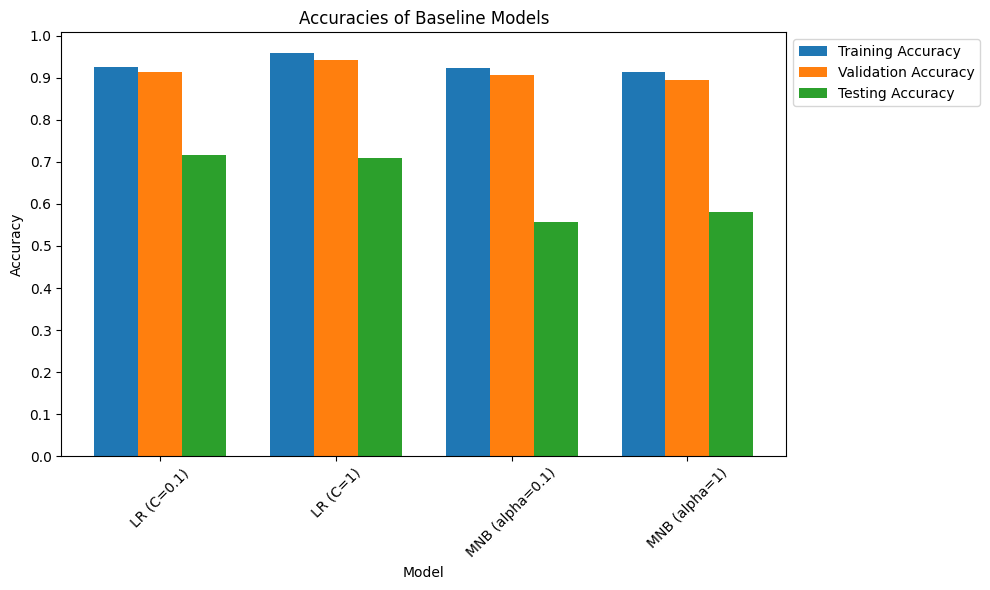

In [ ]:
# Plot the training, validation, and testing accuracies
plt.figure(figsize=(10, 6))

# Set the x positions for each model (shifting them to prevent overlap)
x = np.arange(len(model_accuracies['Model']))

# Adjust width to be smaller and space the bars
bar_width = 0.25

plt.bar(x - bar_width, model_accuracies['Training Accuracy'], width=bar_width, label='Training Accuracy')
plt.bar(x, model_accuracies['Validation Accuracy'], width=bar_width, label='Validation Accuracy')
plt.bar(x + bar_width, model_accuracies['Testing Accuracy'], width=bar_width, label='Testing Accuracy')


# Set the y-axis ticks by intervals of 0.1
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracies of Baseline Models')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Set the model labels on the x-axis
plt.xticks(x, model_accuracies['Model'], rotation=45)

# Layout adjustments
plt.tight_layout()
plt.show()


### **Intermediate Models on Test Set**

In [ ]:
# Use intermediate models to predict the classes for the new data
y_pred_new = svm_linear_model.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    svm_linear_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Model 5 Accuracy on New Data: {svm_linear_test_accuracy:.4f}")


Model 5 Accuracy on New Data: 0.6856


In [ ]:
# Use intermediate models to predict the classes for the new data
y_pred_new = svm_linear_model2.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    svm_linear2_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Model 6 Accuracy on New Data: {svm_linear2_test_accuracy:.4f}")

Model 6 Accuracy on New Data: 0.6544


In [ ]:
# Use intermediate models to predict the classes for the new data
y_pred_new = svm_rbf_model.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    svm_rbf_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Model 7 Accuracy on New Data: {svm_rbf_test_accuracy:.4f}")

Model 7 Accuracy on New Data: 0.6344


In [ ]:
# Use intermediate models to predict the classes for the new data
y_pred_new = svm_rbf_model2.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    svm_rbf2_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Model 8 Accuracy on New Data: {svm_rbf2_test_accuracy:.4f}")

Model 8 Accuracy on New Data: 0.6622


In [ ]:
# Use intermediate models to predict the classes for the new data
y_pred_new = svm_poly_model.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    svm_poly_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Model 9 Accuracy on New Data: {svm_poly_test_accuracy:.4f}")

Model 9 Accuracy on New Data: 0.5122


In [ ]:
# Use intermediate models to predict the classes for the new data
y_pred_new = svm_poly_model2.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    svm_poly2_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Model 10 Accuracy on New Data: {svm_poly2_test_accuracy:.4f}")

Model 10 Accuracy on New Data: 0.4989


In [ ]:
# Initialize Random Forest with chosen parameters
rf_model = RandomForestClassifier(
    n_estimators=150,   # Reduce trees slightly to prevent overfitting
    max_depth=10,       # Lower depth to limit tree complexity
    min_samples_split=15,  # More samples needed to split, reducing variance
    min_samples_leaf=10,   # Larger leaves to prevent very small node splits
    max_features="sqrt",  # Consider only a subset of features per split (better generalization)
    bootstrap=True,       # Use bootstrapping for robust predictions
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=15,
                       n_estimators=150, n_jobs=-1, random_state=42)

In [ ]:
# Use intermediate models to predict the classes for the new data
y_pred_new = rf_model.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    rf_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Model 11 Accuracy on New Data: {rf_test_accuracy:.4f}")

Model 11 Accuracy on New Data: 0.3367


In [ ]:
# Use intermediate models to predict the classes for the new data
y_pred_new = rf_model2.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    rf2_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Model 12 Accuracy on New Data: {rf2_test_accuracy:.4f}")

Model 12 Accuracy on New Data: 0.3333


In [ ]:
# Collect baseline testing accuracies
inter_testing_accuracy_values = [svm_linear_test_accuracy, svm_linear2_test_accuracy, svm_rbf_test_accuracy, svm_rbf2_test_accuracy,
                                 svm_poly_test_accuracy, svm_poly2_test_accuracy, rf_test_accuracy, rf2_test_accuracy]

# Add the new column to the DataFrame
inter_model_accuracies['Testing Accuracy'] = inter_testing_accuracy_values

In [ ]:
# Set pandas options to display all columns horizontally
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Avoid wrapping of columns
pd.set_option('display.max_rows', None)     # Show all rows (if needed)

# Print the updated DataFrame
print(inter_model_accuracies)

                      Model  Training Accuracy  Validation Accuracy  Testing Accuracy
0       SVM (C=0.1, linear)           0.922061             0.915456          0.685556
1         SVM (C=1, linear)           0.943362             0.922721          0.654444
2          SVM (C=0.1, rbf)           0.936427             0.927345          0.634444
3            SVM (C=1, rbf)           0.946004             0.918758          0.662222
4         SVM (C=0.1, poly)           0.942536             0.916116          0.512222
5           SVM (C=1, poly)           0.943527             0.915456          0.498889
6    RF (default, flexible)           0.997853             0.995376          0.336667
7  RF (tuned, conservative)           0.988441             0.986790          0.333333


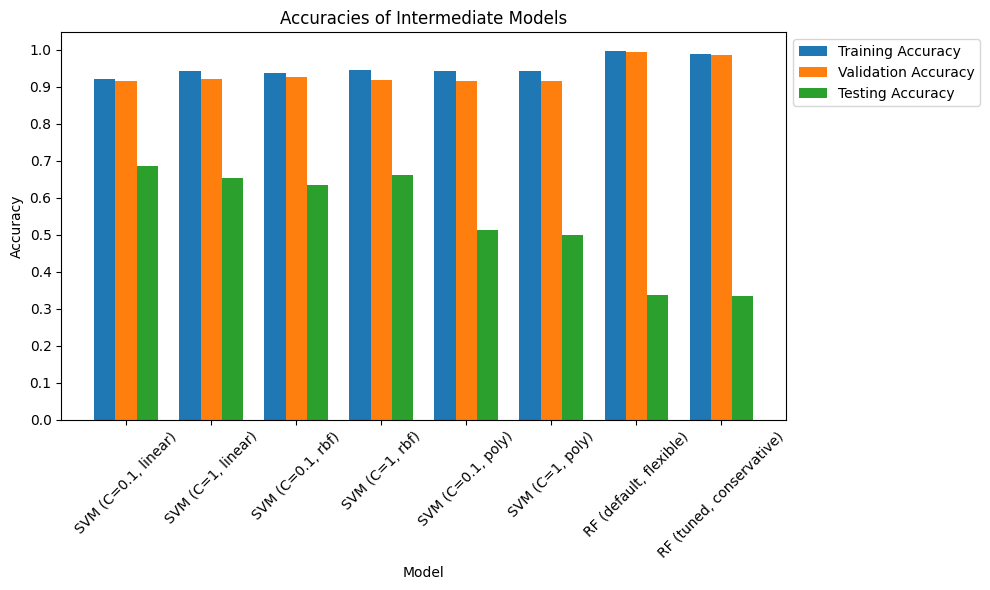

In [ ]:
# Plot the training, validation, and testing accuracies
plt.figure(figsize=(10, 6))

# Set the x positions for each model (shifting them to prevent overlap)
x = np.arange(len(inter_model_accuracies['Model']))

# Adjust width to be smaller and space the bars
bar_width = 0.25

plt.bar(x - bar_width, inter_model_accuracies['Training Accuracy'], width=bar_width, label='Training Accuracy')
plt.bar(x, inter_model_accuracies['Validation Accuracy'], width=bar_width, label='Validation Accuracy')
plt.bar(x + bar_width, inter_model_accuracies['Testing Accuracy'], width=bar_width, label='Testing Accuracy')


# Set the y-axis ticks by intervals of 0.1
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracies of Intermediate Models')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Set the model labels on the x-axis
plt.xticks(x, inter_model_accuracies['Model'], rotation=45)

# Layout adjustments
plt.tight_layout()
plt.show()


## **Fine-Tuning Best Models**

### **Log_Reg1 -> Log_Reg3**

In [ ]:
# Logistic Regression
print("Training Logistic Regression...")
log_reg3 = LogisticRegression(
    C=0.5,             # Regularization strength
    solver='saga',  # Solver for small datasets
    penalty='l1'        # L1 regularization
)
log_reg3.fit(X_train, y_train)

# Training accuracy
train_accuracy_log3 = log_reg3.score(X_train, y_train)
print(f"Fine-Tuned LR Model 1 Train Accuracy: {train_accuracy_log3:.4f}")

# Testing accuracy
y_pred_log3 = log_reg3.predict(X_test)
test_accuracy_log3 = accuracy_score(y_test, y_pred_log3)
print(f"Fine-Tuned LR Model 1 Validation Accuracy: {test_accuracy_log3:.4f}")

Training Logistic Regression...
Fine-Tuned LR Model 1 Train Accuracy: 0.9420
Fine-Tuned LR Model 1 Validation Accuracy: 0.9379


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg3.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    log_reg3_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Fine-Tuned LR Model 1 Testing Accuracy: {log_reg3_test_accuracy:.4f}")

Fine-Tuned LR Model 1 Testing Accuracy: 0.7878


In [ ]:
# Create a DataFrame to store tuned model accuracies
tuned_model_accuracies = pd.DataFrame({
    'Model': ['Tuned LR (C=0.5, saga, L1)'],
    'Training Accuracy': [train_accuracy_log3],
    'Validation Accuracy': [test_accuracy_log3],
    'Testing Accuracy': [log_reg3_test_accuracy]
})

# Display
tuned_model_accuracies

,Model,Training Accuracy,Validation Accuracy,Testing Accuracy
0,"Tuned LR (C=0.5, saga, L1)",0.942041,0.937913,0.787778


### **Log_Reg1 -> Log_Reg4**

In [ ]:
# Logistic Regression
print("Training Logistic Regression...")
log_reg4 = LogisticRegression(
    C=0.1,             # Regularization strength
    solver='liblinear',  # Solver for small datasets
    penalty='l1'        # L1 regularization
)
log_reg4.fit(X_train, y_train)

# Training accuracy
train_accuracy_log4 = log_reg4.score(X_train, y_train)
print(f"Fine-Tuned LR Model 2 Train Accuracy: {train_accuracy_log4:.4f}")

# Testing accuracy
y_pred_log4 = log_reg4.predict(X_test)
test_accuracy_log4 = accuracy_score(y_test, y_pred_log4)
print(f"Fine-Tuned LR Model 2 Validation Accuracy: {test_accuracy_log4:.4f}")

Training Logistic Regression...
Fine-Tuned LR Model 2 Train Accuracy: 0.7097
Fine-Tuned LR Model 2 Validation Accuracy: 0.7279


In [ ]:
# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg4.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    log_reg4_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Fine-Tuned LR Model 2 Testing Accuracy: {log_reg4_test_accuracy:.4f}")

Fine-Tuned LR Model 2 Testing Accuracy: 0.8567


In [ ]:
# Add tuned accuracies
tuned_model_accuracies = pd.concat([tuned_model_accuracies, pd.DataFrame([{
    'Model': 'Tuned LR (C=0.1, liblin, L1)',
    'Training Accuracy': train_accuracy_log4,
    'Validation Accuracy': test_accuracy_log4,
    'Testing Accuracy': log_reg4_test_accuracy
}])], ignore_index=True)

print(tuned_model_accuracies)

                          Model  Training Accuracy  Validation Accuracy  Testing Accuracy
0    Tuned LR (C=0.5, saga, L1)           0.942041             0.937913          0.787778
1  Tuned LR (C=0.1, liblin, L1)           0.709709             0.727873          0.856667


### **Log_Reg1 -> Log_Reg5**

In [ ]:
# Logistic Regression
print("Training Logistic Regression...")
log_reg5 = LogisticRegression(
    C=0.1,             # Regularization strength
    solver='saga',  # Solver for small datasets
    penalty='elasticnet',        # ElasticNet regularization
    l1_ratio=0.4,
)
log_reg5.fit(X_train, y_train)

# Training accuracy
train_accuracy_log5 = log_reg5.score(X_train, y_train)
print(f"Fine-Tuned LR Model 3 Train Accuracy: {train_accuracy_log5:.4f}")

# Testing accuracy
y_pred_log5 = log_reg5.predict(X_test)
test_accuracy_log5 = accuracy_score(y_test, y_pred_log5)
print(f"Fine-Tuned LR Model 3 Validation Accuracy: {test_accuracy_log5:.4f}")

Training Logistic Regression...
Fine-Tuned LR Model 3 Train Accuracy: 0.7951
Fine-Tuned LR Model 3 Validation Accuracy: 0.7860


In [ ]:
# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg5.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    log_reg5_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Fine-Tuned LR Model 3 Testing Accuracy: {log_reg5_test_accuracy:.4f}")

Fine-Tuned LR Model 3 Testing Accuracy: 0.7900


In [ ]:
# Add tuned accuracies
tuned_model_accuracies = pd.concat([tuned_model_accuracies, pd.DataFrame([{
    'Model': 'Tuned LR (C=0.1, elnet, L1r=0.4)',
    'Training Accuracy': train_accuracy_log5,
    'Validation Accuracy': test_accuracy_log5,
    'Testing Accuracy': log_reg5_test_accuracy
}])], ignore_index=True)

print(tuned_model_accuracies)

                              Model  Training Accuracy  Validation Accuracy  Testing Accuracy
0        Tuned LR (C=0.5, saga, L1)           0.942041             0.937913          0.787778
1      Tuned LR (C=0.1, liblin, L1)           0.709709             0.727873          0.856667
2  Tuned LR (C=0.1, elnet, L1r=0.4)           0.795079             0.785997          0.790000


### **log_reg5->log_reg6**

In [ ]:
# Logistic Regression
print("Training Logistic Regression...")
log_reg6 = LogisticRegression(
    C=0.1,             # Regularization strength
    solver='saga',  # Solver for small datasets
    penalty='elasticnet',        # ElasticNet regularization
    l1_ratio=0.4,
    class_weight='balanced'
)
log_reg6.fit(X_train, y_train)

# Training accuracy
train_accuracy_log6 = log_reg6.score(X_train, y_train)
print(f"Fine-Tuned LR Model 4 Train Accuracy: {train_accuracy_log6:.4f}")

# Testing accuracy
y_pred_log6 = log_reg6.predict(X_test)
test_accuracy_log6 = accuracy_score(y_test, y_pred_log6)
print(f"Fine-Tuned LR Model 4 Validation Accuracy: {test_accuracy_log6:.4f}")

Training Logistic Regression...
Fine-Tuned LR Model 4 Train Accuracy: 0.7936
Fine-Tuned LR Model 4 Validation Accuracy: 0.7886


In [ ]:
# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg6.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    log_reg6_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Fine-Tuned LR Model 4 Testing Accuracy: {log_reg6_test_accuracy:.4f}")

Fine-Tuned LR Model 4 Testing Accuracy: 0.8300


In [ ]:
# Add tuned accuracies
tuned_model_accuracies = pd.concat([tuned_model_accuracies, pd.DataFrame([{
    'Model': 'Tuned LR (C=0.1, elnet, L1r=0.4, bal)',
    'Training Accuracy': train_accuracy_log6,
    'Validation Accuracy': test_accuracy_log6,
    'Testing Accuracy': log_reg6_test_accuracy
}])], ignore_index=True)

print(tuned_model_accuracies)

                                   Model  Training Accuracy  Validation Accuracy  Testing Accuracy
0             Tuned LR (C=0.5, saga, L1)           0.942041             0.937913          0.787778
1           Tuned LR (C=0.1, liblin, L1)           0.709709             0.727873          0.856667
2       Tuned LR (C=0.1, elnet, L1r=0.4)           0.795079             0.785997          0.790000
3  Tuned LR (C=0.1, elnet, L1r=0.4, bal)           0.793593             0.788639          0.830000


### **log_reg4->log_reg7**

In [ ]:
# Logistic Regression
print("Training Logistic Regression...")
log_reg7 = LogisticRegression(
    C=0.2,             # Regularization strength
    solver='liblinear',  # Solver for small datasets
    penalty='l1',        # L1 regularization
    class_weight='balanced'
)
log_reg7.fit(X_train, y_train)

# Training accuracy
train_accuracy_log7 = log_reg7.score(X_train, y_train)
print(f"Fine-Tuned LR Model 5 Train Accuracy: {train_accuracy_log7:.4f}")

# Testing accuracy
y_pred_log7 = log_reg7.predict(X_test)
test_accuracy_log7 = accuracy_score(y_test, y_pred_log7)
print(f"Fine-Tuned LR Model 5 Validation Accuracy: {test_accuracy_log7:.4f}")

Training Logistic Regression...
Fine-Tuned LR Model 5 Train Accuracy: 0.8344
Fine-Tuned LR Model 5 Validation Accuracy: 0.8468


In [ ]:
# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg7.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    log_reg7_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Fine-Tuned LR Model 5 Testing Accuracy: {log_reg7_test_accuracy:.4f}")

Fine-Tuned LR Model 5 Testing Accuracy: 0.8289


In [ ]:
# Add tuned accuracies
tuned_model_accuracies = pd.concat([tuned_model_accuracies, pd.DataFrame([{
    'Model': 'Tuned LR (C=0.2, liblin, L1, bal)',
    'Training Accuracy': train_accuracy_log7,
    'Validation Accuracy': test_accuracy_log7,
    'Testing Accuracy': log_reg7_test_accuracy
}])], ignore_index=True)

print(tuned_model_accuracies)

                                   Model  Training Accuracy  Validation Accuracy  Testing Accuracy
0             Tuned LR (C=0.5, saga, L1)           0.942041             0.937913          0.787778
1           Tuned LR (C=0.1, liblin, L1)           0.709709             0.727873          0.856667
2       Tuned LR (C=0.1, elnet, L1r=0.4)           0.795079             0.785997          0.790000
3  Tuned LR (C=0.1, elnet, L1r=0.4, bal)           0.793593             0.788639          0.830000
4      Tuned LR (C=0.2, liblin, L1, bal)           0.834379             0.846764          0.828889


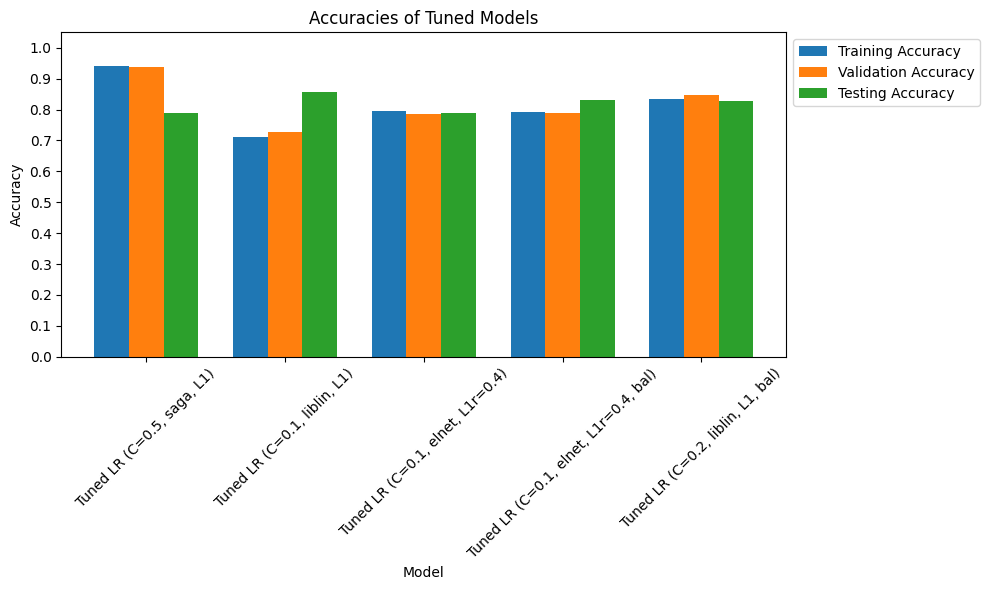

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the training, validation, and testing accuracies
plt.figure(figsize=(10, 6))

# Set the x positions for each model (shifting them to prevent overlap)
x = np.arange(len(tuned_model_accuracies['Model']))

# Adjust width to be smaller and space the bars
bar_width = 0.25

# Plot bars for each accuracy (Training, Validation, Testing) as percentages
bars_train = plt.bar(x - bar_width, tuned_model_accuracies['Training Accuracy'], width=bar_width, label='Training Accuracy')
bars_val = plt.bar(x, tuned_model_accuracies['Validation Accuracy'], width=bar_width, label='Validation Accuracy')
bars_test = plt.bar(x + bar_width, tuned_model_accuracies['Testing Accuracy'], width=bar_width, label='Testing Accuracy')

# Set the y-axis limits to go from 0 to 1.05 (slightly above 1.0)
plt.ylim(0, 1.05)

# Set the y-axis ticks by intervals of 0.1
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracies of Tuned Models')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Set the model labels on the x-axis
plt.xticks(x, tuned_model_accuracies['Model'], rotation=45)

# Layout adjustments
plt.tight_layout()
plt.show()


## **Confusion Matrices**

Fine-Tuned LR Model 1 Testing Accuracy: 0.7878


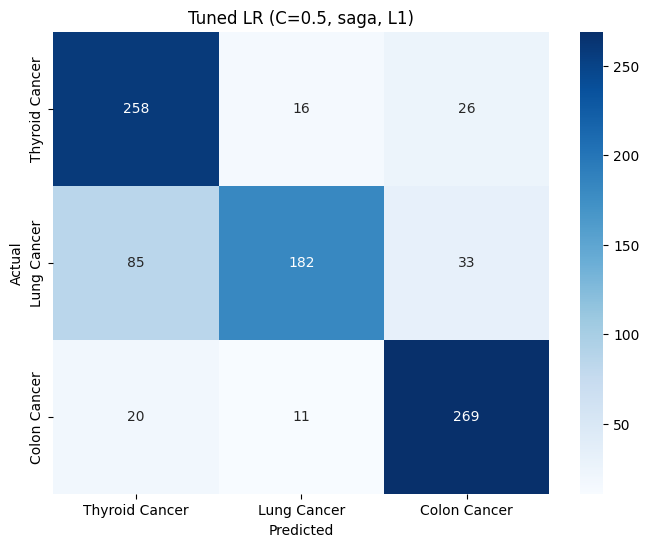

Classification Report:
                precision    recall  f1-score   support

Thyroid Cancer       0.82      0.90      0.86       300
   Lung Cancer       0.87      0.61      0.72       300
  Colon Cancer       0.71      0.86      0.78       300

      accuracy                           0.79       900
     macro avg       0.80      0.79      0.78       900
  weighted avg       0.80      0.79      0.78       900



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg3.predict(X_new_tfidf)

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg3.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    log_reg3_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Fine-Tuned LR Model 1 Testing Accuracy: {log_reg3_test_accuracy:.4f}")

    # Get the unique class labels in the 'Class' column (this will be your actual class labels)
    class_labels = new_df['Class'].unique()

    # Generate confusion matrix with the correct labels
    cm = confusion_matrix(new_df['Class'], new_df['Predicted_Class'], labels=class_labels)

    # Plot confusion matrix using seaborn's heatmap for better visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Tuned LR (C=0.5, saga, L1)')
    plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(new_df['Class'], new_df['Predicted_Class'], target_names=class_labels))

Fine-Tuned LR Model 2 Testing Accuracy: 0.8567


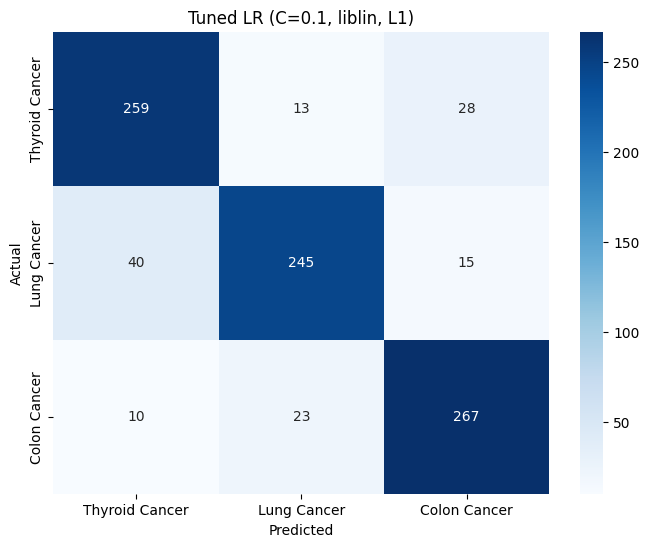

Classification Report:
                precision    recall  f1-score   support

Thyroid Cancer       0.86      0.89      0.88       300
   Lung Cancer       0.87      0.82      0.84       300
  Colon Cancer       0.84      0.86      0.85       300

      accuracy                           0.86       900
     macro avg       0.86      0.86      0.86       900
  weighted avg       0.86      0.86      0.86       900



In [ ]:
# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg4.predict(X_new_tfidf)

# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg4.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    log_reg4_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Fine-Tuned LR Model 2 Testing Accuracy: {log_reg4_test_accuracy:.4f}")

    # Get the unique class labels in the 'Class' column (this will be your actual class labels)
    class_labels = new_df['Class'].unique()

    # Generate confusion matrix with the correct labels
    cm = confusion_matrix(new_df['Class'], new_df['Predicted_Class'], labels=class_labels)

    # Plot confusion matrix using seaborn's heatmap for better visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Tuned LR (C=0.1, liblin, L1)')
    plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(new_df['Class'], new_df['Predicted_Class'], target_names=class_labels))

Fine-Tuned LR Model 3 Testing Accuracy: 0.7900


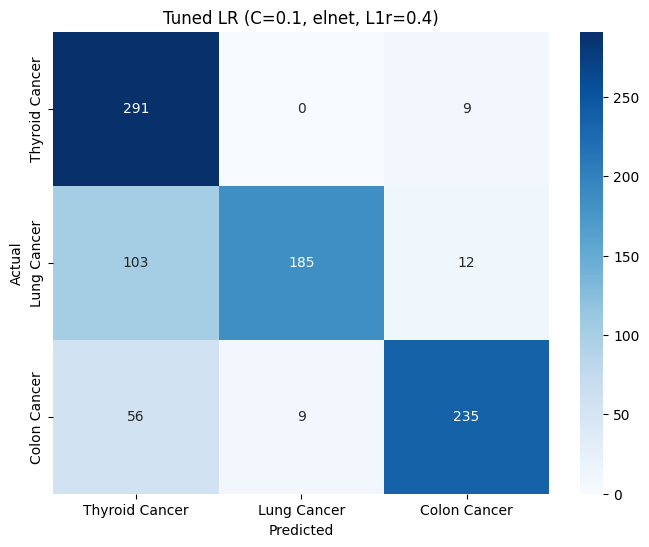

Classification Report:
                precision    recall  f1-score   support

Thyroid Cancer       0.92      0.78      0.85       300
   Lung Cancer       0.95      0.62      0.75       300
  Colon Cancer       0.65      0.97      0.78       300

      accuracy                           0.79       900
     macro avg       0.84      0.79      0.79       900
  weighted avg       0.84      0.79      0.79       900



In [ ]:
# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg5.predict(X_new_tfidf)

# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg5.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    log_reg5_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Fine-Tuned LR Model 3 Testing Accuracy: {log_reg5_test_accuracy:.4f}")

    # Get the unique class labels in the 'Class' column (this will be your actual class labels)
    class_labels = new_df['Class'].unique()

    # Generate confusion matrix with the correct labels
    cm = confusion_matrix(new_df['Class'], new_df['Predicted_Class'], labels=class_labels)

    # Plot confusion matrix using seaborn's heatmap for better visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Tuned LR (C=0.1, elnet, L1r=0.4)')
    plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(new_df['Class'], new_df['Predicted_Class'], target_names=class_labels))

Fine-Tuned LR Model 4 Testing Accuracy: 0.8300


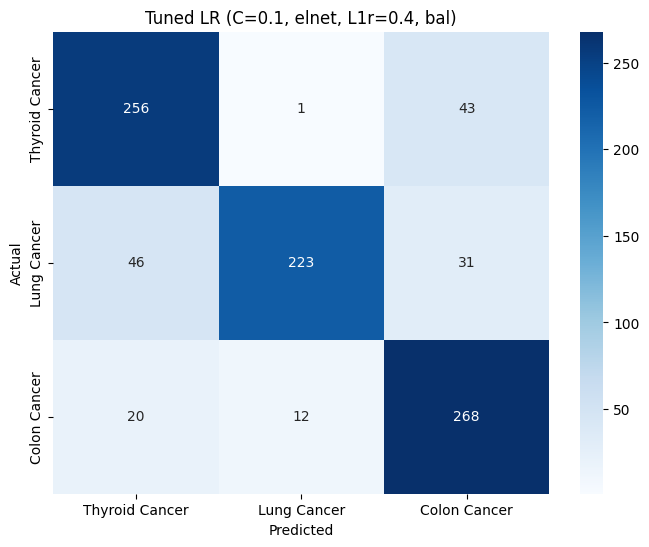

Classification Report:
                precision    recall  f1-score   support

Thyroid Cancer       0.78      0.89      0.83       300
   Lung Cancer       0.94      0.74      0.83       300
  Colon Cancer       0.80      0.85      0.82       300

      accuracy                           0.83       900
     macro avg       0.84      0.83      0.83       900
  weighted avg       0.84      0.83      0.83       900



In [ ]:
# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg6.predict(X_new_tfidf)

# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg6.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    log_reg6_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Fine-Tuned LR Model 4 Testing Accuracy: {log_reg6_test_accuracy:.4f}")

    # Get the unique class labels in the 'Class' column (this will be your actual class labels)
    class_labels = new_df['Class'].unique()

    # Generate confusion matrix with the correct labels
    cm = confusion_matrix(new_df['Class'], new_df['Predicted_Class'], labels=class_labels)

    # Plot confusion matrix using seaborn's heatmap for better visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Tuned LR (C=0.1, elnet, L1r=0.4, bal)')
    plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(new_df['Class'], new_df['Predicted_Class'], target_names=class_labels))

Fine-Tuned LR Model 5 Testing Accuracy: 0.8289


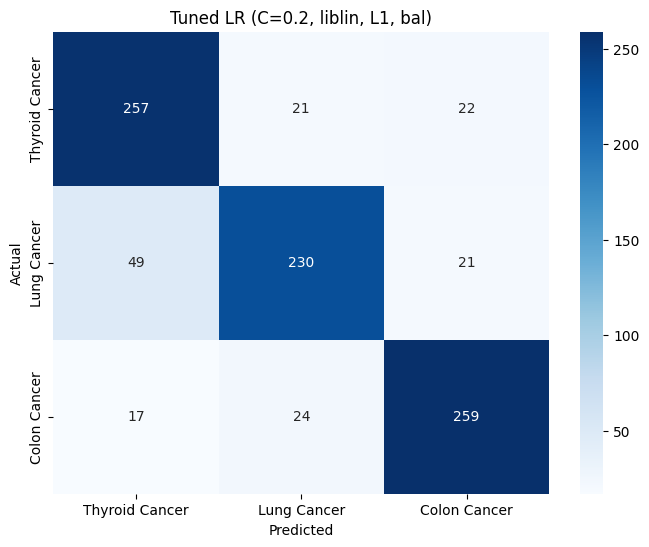

Classification Report:
                precision    recall  f1-score   support

Thyroid Cancer       0.86      0.86      0.86       300
   Lung Cancer       0.84      0.77      0.80       300
  Colon Cancer       0.80      0.86      0.83       300

      accuracy                           0.83       900
     macro avg       0.83      0.83      0.83       900
  weighted avg       0.83      0.83      0.83       900



In [ ]:
# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg7.predict(X_new_tfidf)

# Use fine-tuned models to predict the classes for the new data
y_pred_new = log_reg7.predict(X_new_tfidf)

# Add the predictions to the new_df
new_df['Predicted_Class'] = y_pred_new

# Testing Accuracy
if 'Class' in new_df.columns:
    # Calculate accuracy
    log_reg7_test_accuracy = accuracy_score(new_df['Class'], new_df['Predicted_Class'])
    print(f"Fine-Tuned LR Model 5 Testing Accuracy: {log_reg7_test_accuracy:.4f}")

    # Get the unique class labels in the 'Class' column (this will be your actual class labels)
    class_labels = new_df['Class'].unique()

    # Generate confusion matrix with the correct labels
    cm = confusion_matrix(new_df['Class'], new_df['Predicted_Class'], labels=class_labels)

    # Plot confusion matrix using seaborn's heatmap for better visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Tuned LR (C=0.2, liblin, L1, bal)')
    plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(new_df['Class'], new_df['Predicted_Class'], target_names=class_labels))

In [ ]:
# Calculate the total number of observations
total_observations = cm.sum()

# Calculate the total number of misclassified observations
misclassified = cm.sum() - np.trace(cm)  # Total observations minus correct predictions

# Display the results
print(f"Total Observations: {total_observations}")
print(f"Total Misclassified: {misclassified}")

Total Observations: 900
Total Misclassified: 154
